<h1><center>Part I: From data to visualization</center></h1>

In [240]:
# DEPENDENIES
import pandas as pd
import numpy as np
# from plotnine import *
# import plotly
# import ggplot as gp
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

%matplotlib inline
# theme_set(theme_void());

# Set up parameters
titlesize = 70
labelsize = 45
plaincolor = "#212F3D"
blurcolor = "#D5D8DC"
markers = ['o','s','d', '^','v','.', ',', 'x', '+',  '<', '>']

## 2. Visualizing data: Mapping data onto aesthetics

### 2.1 Aesthetics and types of data

**Aesthetics:** shape, size, color, position, line width, line type

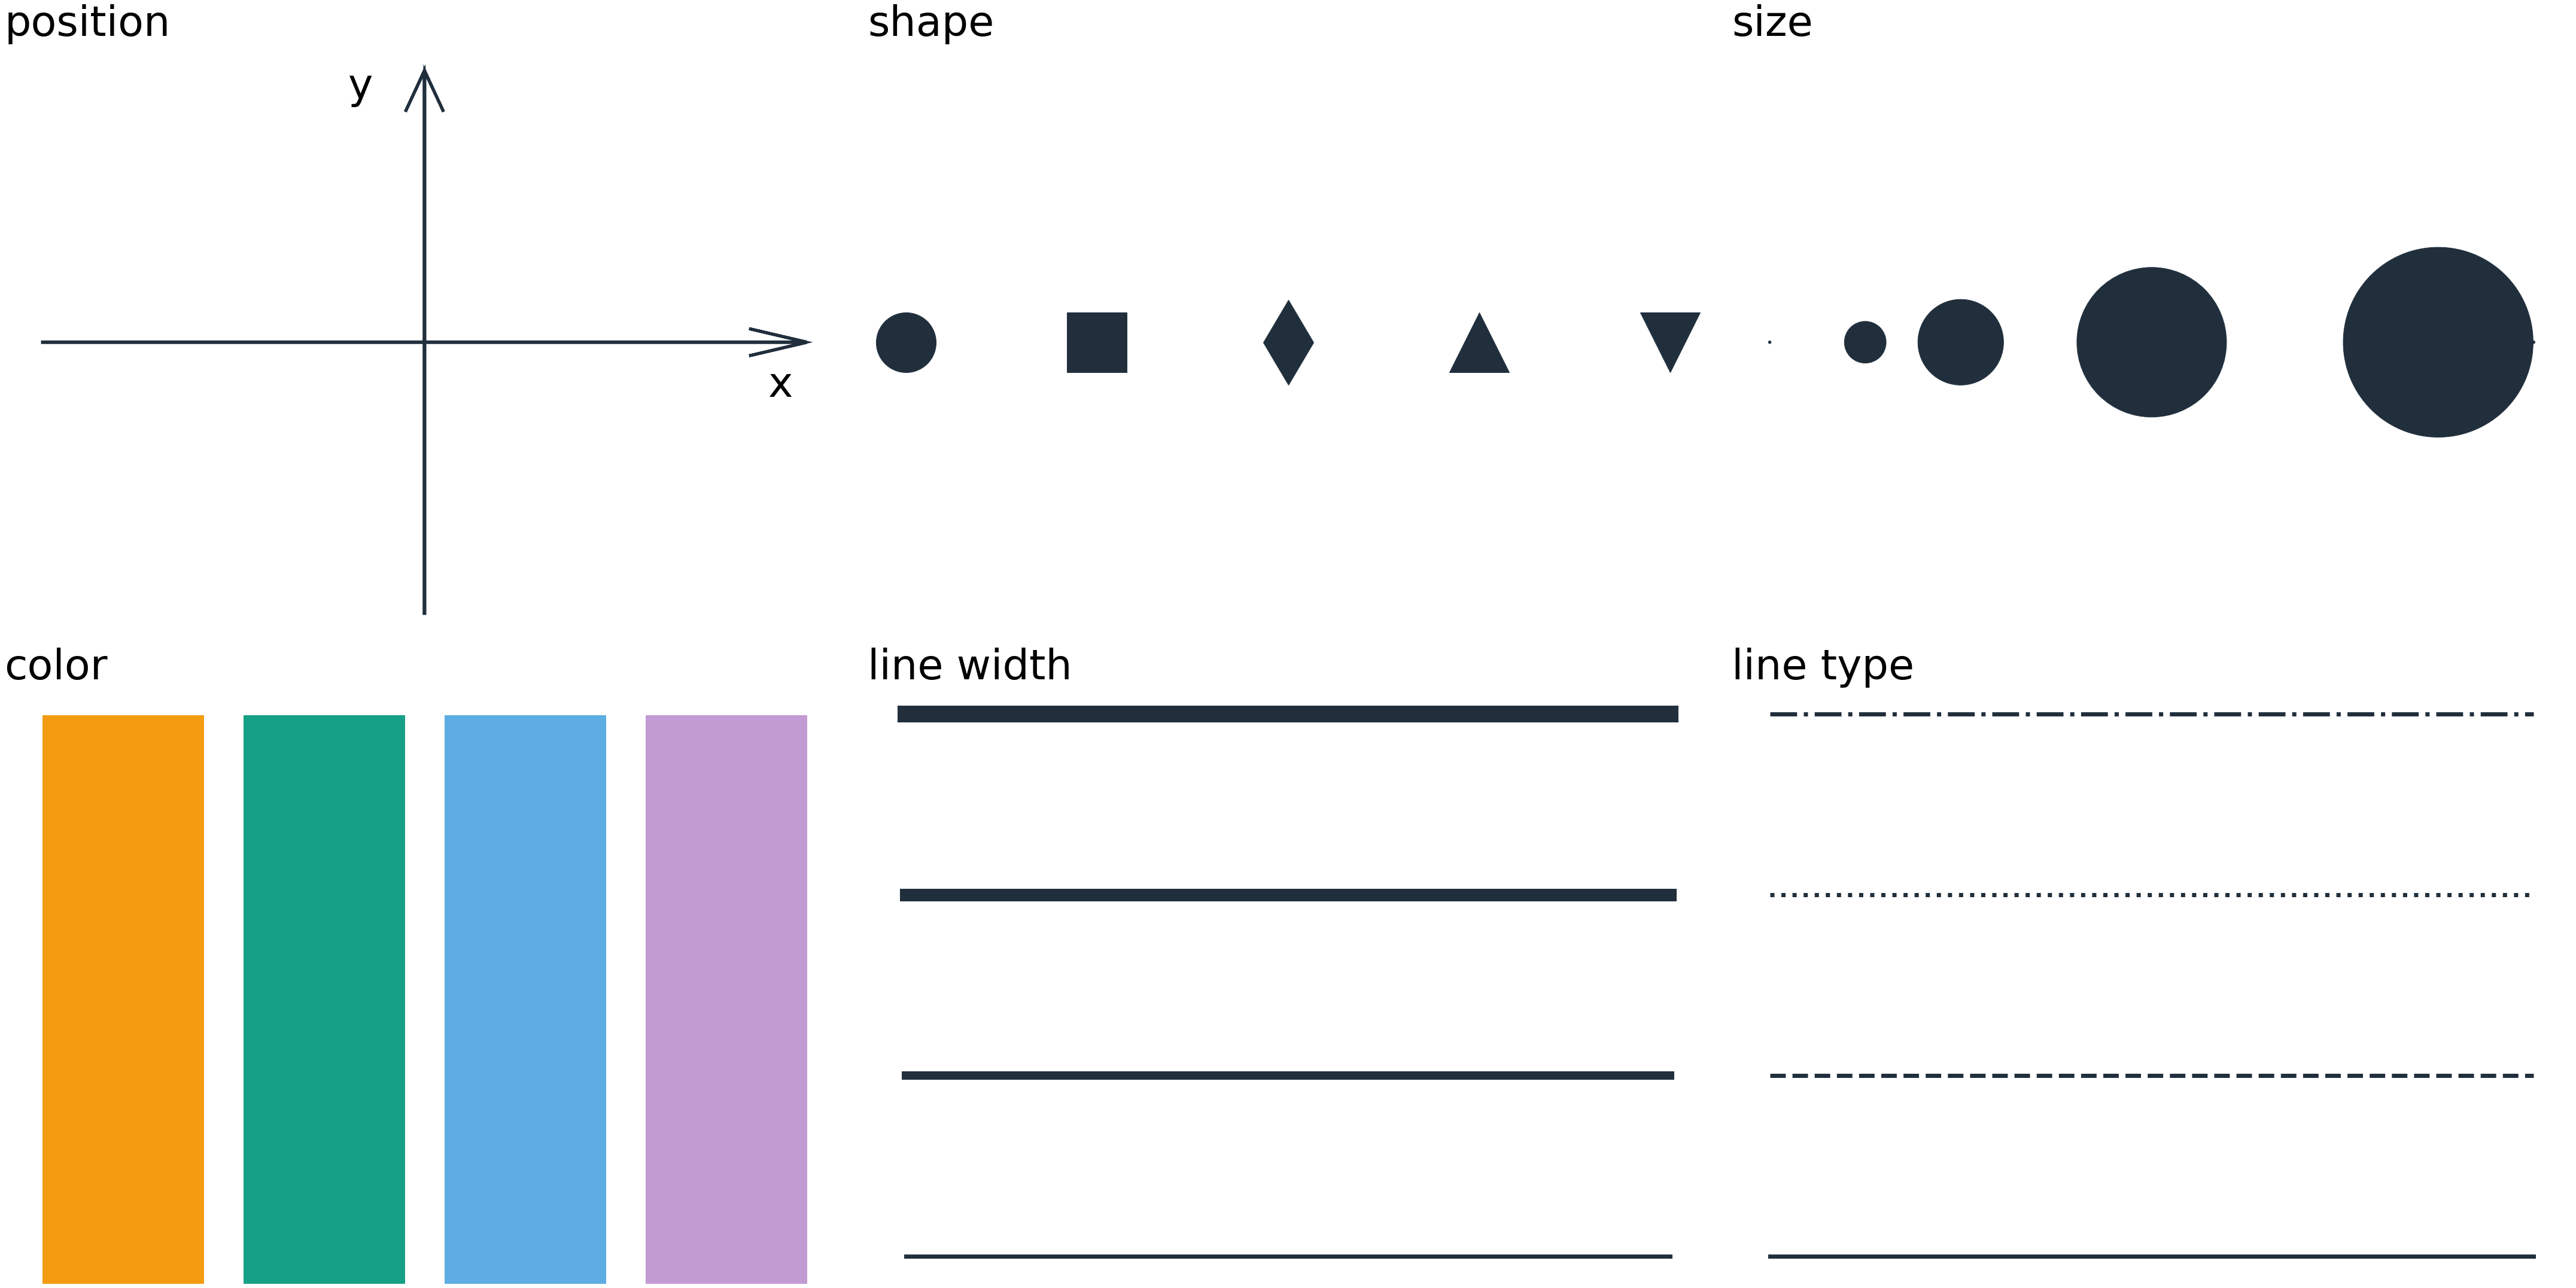

<Figure size 4320x2160 with 0 Axes>

Figure 2.1: Commonly used aesthetics in data visualization: position, shape, size, color, line width, line type.


In [241]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(60,30))
plt.figure(figsize = (60,30))

# Position
ax1.arrow(0.5,0,0,1, linewidth=5, head_width=.05, color = plaincolor, length_includes_head=True, overhang=1,fill=False)
ax1.arrow(0,0.5,1,0, linewidth=5, head_width=.05, color = plaincolor, length_includes_head=True, overhang=1,fill=False)
ax1.set_title("position",fontsize=titlesize,loc="left")
ax1.text(0.4,0.95,"y",fontsize=titlesize)
ax1.text(0.95,0.4,"x",fontsize=titlesize)
ax1.axis("off");

#Shape
x = [i for i in range(len(markers[:5]))]
y = [0]*len(x)
for i in range(len(markers[:5])):
    ax2.plot(x[i]+0.1,y[i],markers[i],markersize=100,color="#212F3D")
ax2.set_title("shape",fontsize=titlesize,loc="left")
ax2.axis("off");

#Size
x = [0,0.5,1,2,3.5,4]
y = [0]*len(x)
scale = [0,2,3,4,4.5,0]
s = [20*(n+1)**5 for n in scale]
ax3.scatter(x,y,s=s,color="#212F3D", clip_on=False)
ax3.set_title("size",fontsize=titlesize,loc="left")
ax3.axis("off");

# Color
x = ["#F39C12","#16A085","#5DADE2","#C39BD3"]
barls = ax4.bar(x,[1]*len(x))
for i in range(len(x)):
    barls[i].set_color(x[i])
ax4.set_title("color",fontsize=titlesize,loc="left")
ax4.axis("off");

#Line width
for i in range(4):
    ax5.plot([1,3],[i]*2,"-",linewidth=7*(i+1),color=plaincolor)
ax5.set_title("line width",fontsize=titlesize,loc="left")
ax5.axis("off");

# Line type
linetypes = ["-","--",":","-."]
for i in range(len(linetypes)):
    ax6.plot([1,3], [i]*2, linetypes[i], linewidth=7, color="#212F3D")
ax6.set_title("line type",fontsize=titlesize,loc="left")
ax6.axis("off");

fig.subplots_adjust(hspace=10,wspace=10)
plt.show()
print("Figure 2.1: Commonly used aesthetics in data visualization: position, shape, size, color, line width, line type.")

**All aesthetics fall into 2 groups:**
* those that can represent continuous data
* those that do not represent continuous data

**Data types in visualization:**

| Type of variable                  | Examples                                     |
|:---------------------------------:|:--------------------------------------------:|
| quantitative/numerical continuous | 1.3, 5.7, 83, 1.5x10-2                       |
| quantitative/numerical discrete   | 1, 2, 3, 4                                   |
| qualitative/categorical unordered | dog, cat, fish                               |
| qualitative/categorical ordered   | good, fair, poor                             |
| date or time                      | Jan. 5 2018, 8:03am                          |
| text                              | The quick brown fox jumps over the lazy dog. |

Example in in the **Table 2.2** below:
* Month: ordered factor
* Day: discrete numerical value
* Location: unordered factor
* Station ID: unordered factor
* Temperature: continuous numerical value

### 2.2. Scales map data values onto aesthetics

To map data values onto aesthetiics:
* Specify which data values correspond to which specific aesthetics values
* Specify which data values are represented by particular shapes or colors

=> This mapping is created via *scales* (must be one-to-one)

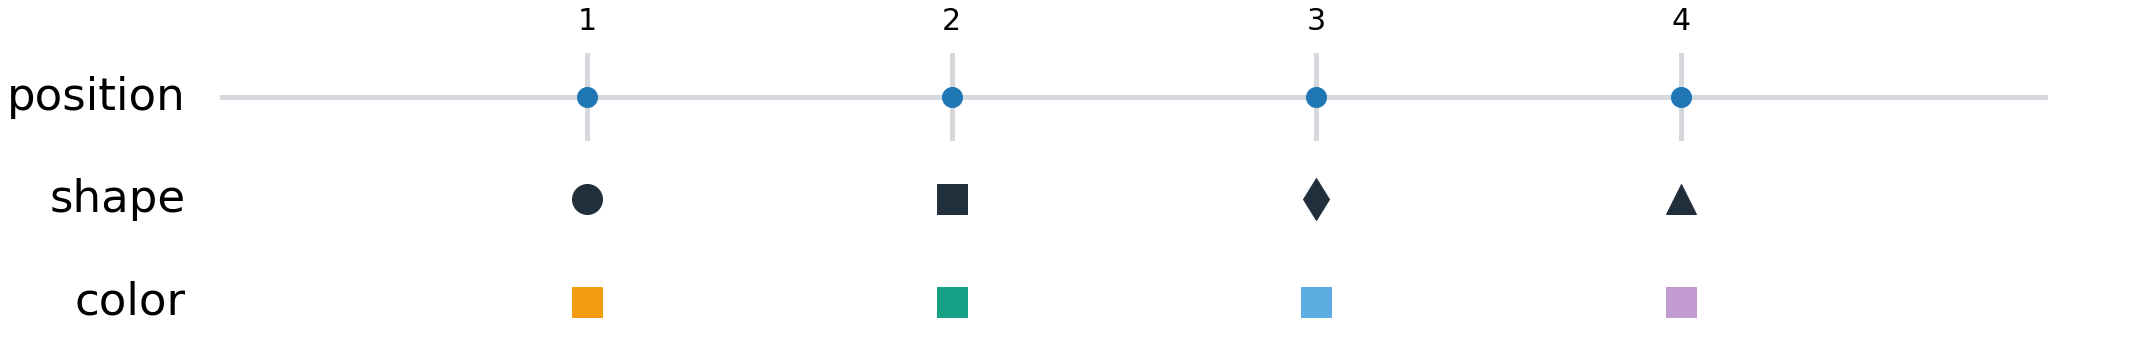

Figure 2.2: Scales link data values to aesthetics. Here, the numbers 1 through 4 have been mapped onto a position scale, a shape scale, and a color scale. For each scale, each number corresponds to a unique position, shape, or color and vice versa.


In [242]:
x = [i+1 for i in range(6)]
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(30,5))

# position
ax1.text(0.9,3,"position",fontsize=labelsize,ha="right",va="center")
ax1.plot(x,[3]*len(x),"-",linewidth=5,color=blurcolor)
for i in range(len(x[1:-1])):
    ax1.text(x[i+1],3.4,"{}".format(i+1),fontsize=30,ha="center")
    ax1.plot([x[i+1]]*2,[2.75,3.25],linewidth=5,color=blurcolor)
ax1.plot(x[1:-1],[3]*(len(x)-2),"o",markersize=20)
ax1.axis("off")

#shape
ax2.text(0.9,2,"shape",fontsize=labelsize,ha="right",va="center")
ax2.plot(x,[2]*len(x),"-",linewidth=5,color="#ffffff00")
for i in range(4):
    ax2.plot(x[i+1],2,markers[i],markersize=30,color = plaincolor)
ax2.axis("off")

#color
ax3.text(0.9,1,"color",fontsize=labelsize,ha="right",va="center")
colors = ["#F39C12","#16A085","#5DADE2","#C39BD3"]
ax3.plot(x,[1]*len(x),"-",linewidth=5,color="#ffffff00")
for i in range(len(colors)):
    ax3.plot(x[i+1],1,"s",markersize=30,color = colors[i])
ax3.axis("off");
plt.show()
print("Figure 2.2: Scales link data values to aesthetics. Here, the numbers 1 through 4 have been mapped onto a position scale, a shape scale, and a color scale. For each scale, each number corresponds to a unique position, shape, or color and vice versa.")

Visualize the data in **Table 2.2**

In [243]:
table2_2 = pd.read_csv("../data/resources/ncdc_normals.tsv",sep="\t")
table2_2['location'] = table2_2['station_id'].map({
    "USW00014819": 'Chicago',
    "USW00093107": 'San Francisco',
    "USW00012918": 'Houston',
    "USC00042319": 'Death Valley',
})
table2_2.dropna(inplace=True)
table2_2.sort_values(by=["month", "day"],inplace=True)
table2_2 = table2_2[['month', 'day', 'location', 'station_id', 'temperature']]
table2_2.reset_index(drop=True,inplace=True)
table2_2['temperature'] = table2_2['temperature'].astype(int)
table2_2.head()

,month,day,location,station_id,temperature
0,1,1,Death Valley,USC00042319,51
1,1,1,Houston,USW00012918,53
2,1,1,Chicago,USW00014819,25
3,1,1,San Francisco,USW00093107,55
4,1,2,Death Valley,USC00042319,51


Text(0.5, 1.0, 'Daily temperature normals for 4 selected locations in the US')

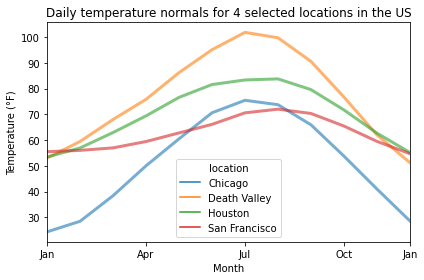

In [244]:
import seaborn as sns
temp_by_month = table2_2.groupby(['month', 'location']).mean().reset_index()
sns.lineplot(x="month", y="temperature", data=temp_by_month, hue="location", linewidth=3, alpha=0.6)

plt.xlim(1,12)
plt.xticks([1,4,7,10,12],["Jan","Apr","Jul","Oct", "Jan"])
plt.xlabel("Month")

plt.ylabel("Temperature (°F)")
plt.title("Daily temperature normals for 4 selected locations in the US")


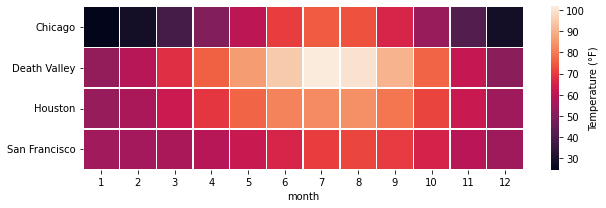

In [245]:
plt.figure(figsize=(9,3))
sns.heatmap(temp_by_month.pivot(index="location", columns="month", values="temperature"), 
            cmap="rocket", 
            linewidths=.5, 
            cbar_kws={"label": "Temperature (°F)"})

plt.ylabel("");


Using five scales for visualizing the data: two position scales, one color scale, one size scale, and one shape scale.

In [246]:
!wget https://gist.githubusercontent.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c/raw/898a40b035f7c951579041aecbfb2149331fa9f6/mtcars.csv -O ../data/resources/mtcars.csv

df = pd.read_csv("../data/resources/mtcars.csv")
df.rename(columns={"Unnamed: 0":"series"},inplace=True)
df.head()

--2022-05-09 11:52:16--  https://gist.githubusercontent.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c/raw/898a40b035f7c951579041aecbfb2149331fa9f6/mtcars.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1783 (1,7K) [text/plain]
Saving to: ‘../data/resources/mtcars.csv’

../data/resources/m 100%[===================>]   1,74K  --.-KB/s    in 0s      

2022-05-09 11:52:16 (7,84 MB/s) - ‘../data/resources/mtcars.csv’ saved [1783/1783]



,series,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


/Users/hoanguyen/miniconda3/envs/dataviz/lib/python3.6/site-packages/ipykernel_launcher.py:75: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/hoanguyen/miniconda3/envs/dataviz/lib/python3.6/site-packages/ipykernel_launcher.py:76: UserWarning: FixedFormatter should only be used together with FixedLocator


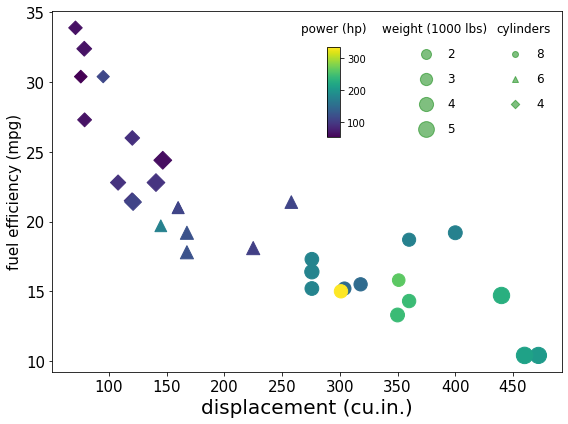

In [305]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# https://matplotlib.org/3.5.0/gallery/axes_grid1/demo_colorbar_with_inset_locator.html

label_size = 20
tick_size = 15
legend_size = 12

cm = plt.cm.get_cmap('viridis')

def mscatter(x,y,ax=None, m=None, **kw):
    import matplotlib.markers as mmarkers
    if not ax: ax=plt.gca()
    sc = ax.scatter(x,y,**kw)
    if (m is not None) and (len(m)==len(x)):
        paths = []
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                        marker_obj.get_transform())
            paths.append(path)
        sc.set_paths(paths)
    
    return sc

fig, ax = plt.subplots(figsize=(8,6))

scatter = mscatter(df["disp"], df["mpg"], ax=ax, 
              s=df["wt"]*50, c=df["hp"],
              m=df['cyl'].map({8: 'o', 6: '^', 4: 'D'}),
              cmap=cm,      
)

# Legend
weights = []
for area in [2,3,4,5]:
    weights.append(plt.scatter([], [], c='g', alpha=0.5, s=area*50, label=str(area)))
    
legend1 = plt.legend(weights, [2,3,4,5], 
                     title='weight (1000 lbs)',
                     fontsize=legend_size, 
                     frameon=False, 
                     labelspacing=1, 
                     bbox_to_anchor=(0.875,1))
legend1.get_title().set_fontsize(legend_size)

cyls = []
for cyl, marker in zip([8, 6, 4], ['o', '^', 'D']):
    cyls.append(plt.scatter([], [], c='g', alpha=0.5, marker=marker, label=str(cyl)))
    
legend2 = plt.legend(cyls, [8, 6, 4], title='cylinders', fontsize=legend_size, frameon=False, labelspacing=1)
legend2.get_title().set_fontsize(legend_size)

plt.gca().add_artist(legend1)

colorbar = inset_axes(ax,
                      width="5%",
                      height="50%",
                      bbox_to_anchor=(0.075, 0.415, 0.5, 0.5),
                      bbox_transform=ax.transAxes
)

cbar = fig.colorbar(scatter, cax=colorbar, ticks=[100, 200, 300])
# https://stackoverflow.com/a/33740567/11524628
cbar.ax.set_title("power (hp)", fontsize=legend_size, pad=15)

ax.set_xlabel('displacement (cu.in.)', fontsize=label_size)
ax.set_ylabel('fuel efficiency (mpg)', fontsize=tick_size)
ax.set_xticklabels(ax.get_xticks().astype(int), fontsize=tick_size)
ax.set_yticklabels(ax.get_yticks().astype(int), fontsize=tick_size);